In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer= pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
customer.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [51]:
from scipy import stats

##### <span style='color:Blue'> I. Dealing with Numeric Columns w/ Very Few Unique Values </span>

Running the example reports the column and the number of unique values for each column, followed by the percentage of unique values out of all rows in the dataset. Here, we can see that some columns have a very low percentage of unique values, such as below 1 percent. Perhaps the unique values can be encoded as ordinal values or as categorical values for analysis. 

In [38]:
customer.nunique()
uniqueVal= pd.DataFrame(columns=['colName', 'numUnique Values', 'PercentageUnique'])
for col in customer.select_dtypes(exclude='object').columns:
    numUnique=len(customer[col].unique())
    percentage= float(numUnique)/customer.shape[0]*100
    newRow=pd.Series({'colName':col, 'numUnique Values':numUnique,'PercentageUnique': percentage })
    uniqueVal=pd.concat([uniqueVal, newRow.set_axis(uniqueVal.columns).to_frame().T],axis=0)
uniqueVal['PercentageUnique']= uniqueVal['PercentageUnique'].map('{:,.3f}%'.format)
uniqueVal

,colName,numUnique Values,PercentageUnique
0,CustomerID,5630,100.000%
0,Churn,2,0.036%
0,Tenure,37,0.657%
0,CityTier,3,0.053%
0,WarehouseToHome,35,0.622%
0,HourSpendOnApp,7,0.124%
0,NumberOfDeviceRegistered,6,0.107%
0,SatisfactionScore,5,0.089%
0,NumberOfAddress,15,0.266%
0,Complain,2,0.036%


> Converting Appropriate Columns to Ordinal/Categorical Data Type 


In [39]:
def categoryCol(row, color='pink'):
    attr= 'background-color: {}'.format(color)
    if row.Num_Unique_Values <10 and row.Data_Type != 'object':
        return [attr]*len(row)
    else:
        None
        
unique_counts = pd.DataFrame.from_records([(col, customer[col].dtype, customer[col].nunique()) for col in customer.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values']).sort_values(by=['Num_Unique_Values'])
unique_counts.style.apply(categoryCol, axis=1)

,Column_Name,Data_Type,Num_Unique_Values
1,Churn,int64,2
14,Complain,int64,2
7,Gender,object,2
3,PreferredLoginDevice,object,3
4,CityTier,int64,3
12,MaritalStatus,object,3
11,SatisfactionScore,int64,5
9,NumberOfDeviceRegistered,int64,6
10,PreferedOrderCat,object,6
8,HourSpendOnApp,float64,6


In [40]:
for col in customer:
    if col in ['Churn','Complain','CityTier','SatisfactionScore','NumberOfDeviceRegistered','HourSpendOnApp']:
        customer[col]= customer[col].astype('object')
cusCat= customer.select_dtypes(exclude=np.number)    
pd.set_option('max_colwidth', None)
cusCat_df = pd.DataFrame.from_records([(col, cusCat[col].dtype, cusCat[col].nunique(), cusCat[col].unique().tolist()) for col in cusCat.columns],
                          columns=['Column_Name','Data_Type', 'Num_Unique_Values', 'Unique Values']).sort_values(by=['Num_Unique_Values'])
cusCat_df

,Column_Name,Data_Type,Num_Unique_Values,Unique Values
0,Churn,object,2,"[1, 0]"
4,Gender,object,2,"[Female, Male]"
10,Complain,object,2,"[1, 0]"
1,PreferredLoginDevice,object,3,"[Mobile Phone, Phone, Computer]"
2,CityTier,object,3,"[3, 1, 2]"
9,MaritalStatus,object,3,"[Single, Divorced, Married]"
8,SatisfactionScore,object,5,"[2, 3, 5, 4, 1]"
5,HourSpendOnApp,object,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
6,NumberOfDeviceRegistered,object,6,"[3, 4, 5, 2, 1, 6]"
7,PreferedOrderCat,object,6,"[Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery]"


In [41]:
#Mobile phone, mobile, and phone are both same, so merged 
cusCat.loc[cusCat['PreferredLoginDevice']== 'Phone', 'PreferredLoginDevice'] = 'Mobile Phone'
cusCat.loc[cusCat['PreferedOrderCat']== 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'
#Replacing cod with Cash on Delivery
cusCat['PreferredPaymentMode']= np.where(cusCat['PreferredPaymentMode']== 'COD', 'Cash on Delivery', cusCat['PreferredPaymentMode'])
#Replacing cc with Credict card using lambda function 
cusCat['PreferredPaymentMode']= cusCat['PreferredPaymentMode'].apply(lambda x: 'Credit Card' if x=='CC' else x)
#merged back to the customer dataset 
customer.update(cusCat, join='left', overwrite= True)

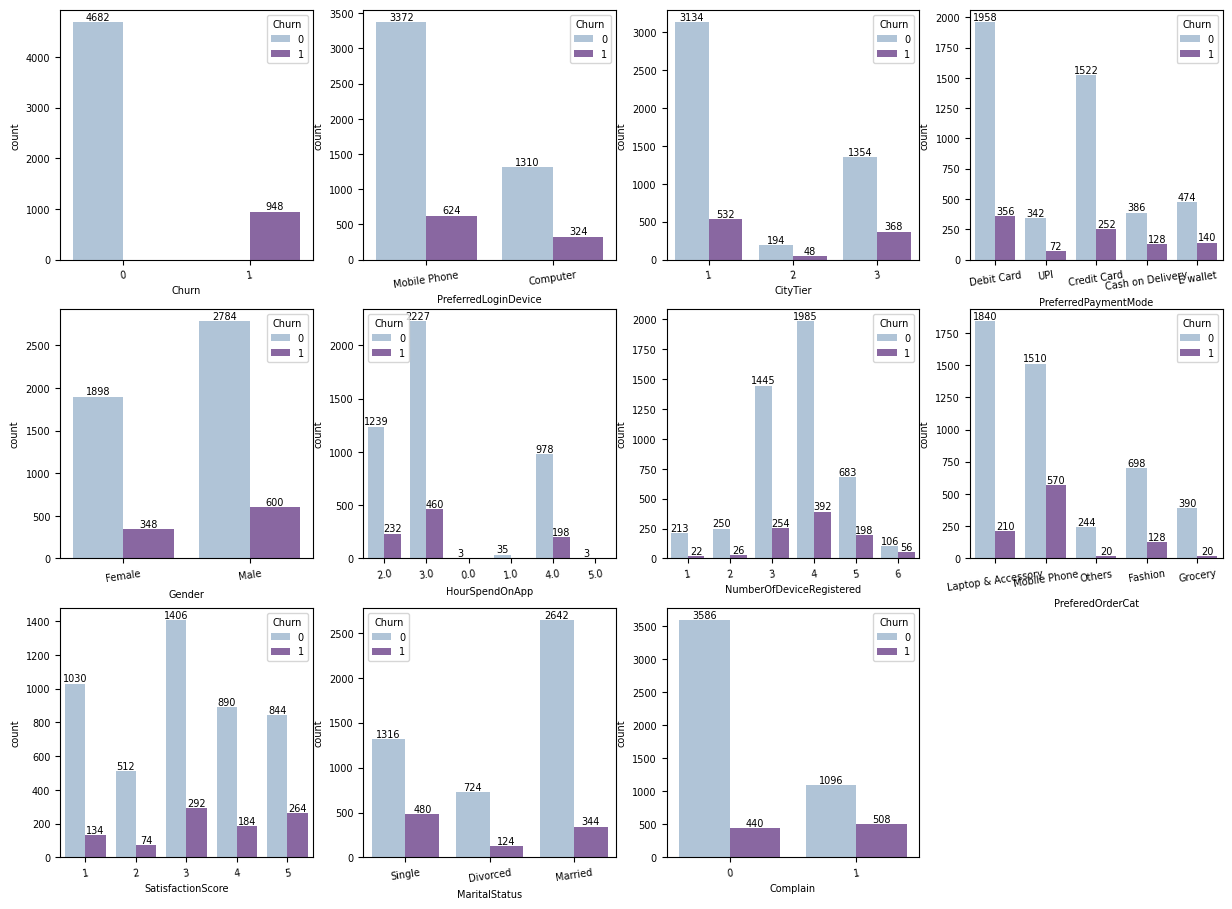

In [42]:
plt.rcParams.update({'font.size': 7})
fig, axes= plt.subplots(nrows=3,ncols=4, figsize=(15,11))
for i, subplots in zip(cusCat, axes.flatten()):
    g=sns.countplot(x=cusCat[i], hue= cusCat['Churn'], ax= subplots, palette='BuPu')
    for container in g.containers:
        g.bar_label(container)
    g.tick_params(axis='x',rotation=8.5)
for subplots in axes.flatten()[len(cusCat.columns):]:
    subplots.remove()
plt.show()


- Group long tail categories together. One transformation that you would want to apply to categorical variables but not continuous variables is grouping long tail categories together. Long tail categories are sparse categories that do not have many observations belonging to them. If there is not enough data to make meaningful inference on these long tail categories, it often makes sense to group them together into a ‘other’ category.


##### <span style='color:Blue'> II. Assessment on Duplicated/Missing Values </span>

If duplicated row existed: False


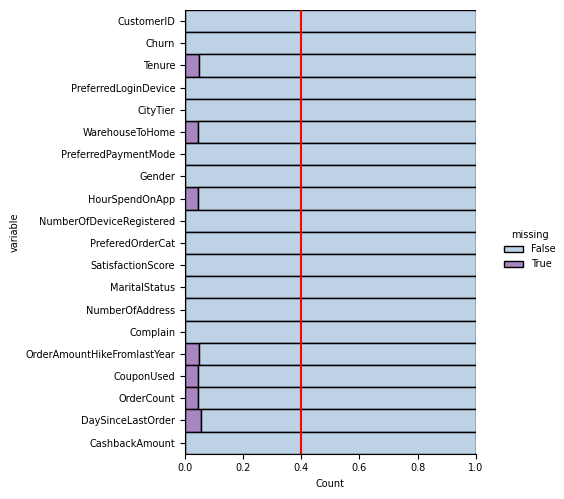

In [46]:
print('If duplicated row existed:',customer.duplicated().any())
plt.rcParams.update({'font.size': 7})
sns.displot(
    data=customer.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    palette='BuPu'
)
# specifying a threshold value
plt.axvline(0.4, color='r')
plt.show()

In [59]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   object 
 9   NumberOfDeviceRegistered     5630 non-null   object 
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

> Missing Data Imputation with MissForest Imputation 

One popular technique for imputation is a K-nearest neighbor model, by finding the samples in the training set “closest” to it and averages these nearby points to fill in the value, but it's prone to outliers and can only work on numeric datasets. 

Here, Miss Forest is used as it copes with both continuous and discrete attributes very well. It initially imputes all missing data using the “Mean-Median-Mode Imputaion” or “Random Sampling Imputation”, then for each attribute with missing entries, Miss Forest fits a random forest on the observed part and then predicts the missing part. 

In [77]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#lebel the missing data with mean-median-mode
def add_label(data, attr, name_notnan='Training',name_nan='Predict'):
    #getting the position of the null val for column
    nullPos= data[attr][data[attr].isnull()].index
    data['Label']= name_notnan
    #identify row with missing values, need to be predicted
    data.iloc[nullPos, data.columns.get_loc('Label')]= name_nan

def mean_median_imputer(data, kind='mean'):
    if kind=='mean':
        #getting the mean avoiding null values
        return data.fillna(np.mean(data.dropna()))
    elif kind=='median':
        return data.fillna(np.median(data.dropna()))

def mode_imputer(data):
    return data.fillna(stats.mode(data))

def missForest(data, attrb, dtype):
    train, test= data[data['Label']=='Training'],data[data['Label']=='Predict'] 
    Y, X= data[attrb], data.drop(['Label', attrb], axis=1)
    y_train, y_test= train[attrb], test[attrb]
    x_train, x_test= train.drop(['Label', attrb], axis=1), test.drop(['Label', attrb], axis=1)
    if dtype=='continious':
        model= RandomForestRegressor(random_state=61)
        model.fit(x_train,y_train)
    elif dtype=='categorical':
        model=RandomForestClassifier(random_state=61)
        model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    return y_pred, Y[data['Label']=='Predict'].index

In [71]:
data= pd.get_dummies(customer)
#getting the colnames of nonNull attribute
not_null_attr= data.isnull().sum()[data.isnull().sum()==0].index
null_attr= data.isnull().sum()[data.isnull().sum()!=0].index

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [81]:
data= pd.get_dummies(customer)
date= data.drop('CustomerID', inplace=True, axis=1)
#getting the colnames of nonNull attribute
not_null_attr= data.isnull().sum()[data.isnull().sum()==0].index
null_attr= data.isnull().sum()[data.isnull().sum()!=0].index
attrbs={}
for i in null_attr:
    df= pd.concat((data[not_null_attr],data[i]), axis=1)
    add_label(df,i)
    if i in ['Tenure','WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']:
        df[i]= mean_median_imputer(df[i], kind='mean')
        for job in range(5):
            value, index= missForest(df, i, dtype='continious')
            df.iloc[index, df.columns.get_loc(i)]= value
            #df[i].iloc[index]= value
    else:
        df[i]=mode_imputer(df[i])
        for job in range(5):
            value, index= missForest(df, i, dtype='categorical')
            df.iloc[index, df.columns.get_loc(i)]= value
            #df[i].iloc[index]= value
    attrbs[i]=df[i]

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [88]:
attrbs

{'Tenure': 0        4.00
 1        6.66
 2        5.50
 3        0.00
 4        0.00
         ...  
 5625    10.00
 5626    13.00
 5627     1.00
 5628    23.00
 5629     8.00
 Name: Tenure, Length: 5630, dtype: float64,
 'WarehouseToHome': 0        6.0
 1        8.0
 2       30.0
 3       15.0
 4       12.0
         ... 
 5625    30.0
 5626    13.0
 5627    11.0
 5628     9.0
 5629    15.0
 Name: WarehouseToHome, Length: 5630, dtype: float64,
 'OrderAmountHikeFromlastYear': 0       11.0
 1       15.0
 2       14.0
 3       23.0
 4       11.0
         ... 
 5625    18.0
 5626    16.0
 5627    21.0
 5628    15.0
 5629    13.0
 Name: OrderAmountHikeFromlastYear, Length: 5630, dtype: float64,
 'CouponUsed': 0       1.0
 1       0.0
 2       0.0
 3       0.0
 4       1.0
        ... 
 5625    1.0
 5626    1.0
 5627    1.0
 5628    2.0
 5629    2.0
 Name: CouponUsed, Length: 5630, dtype: float64,
 'OrderCount': 0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 562

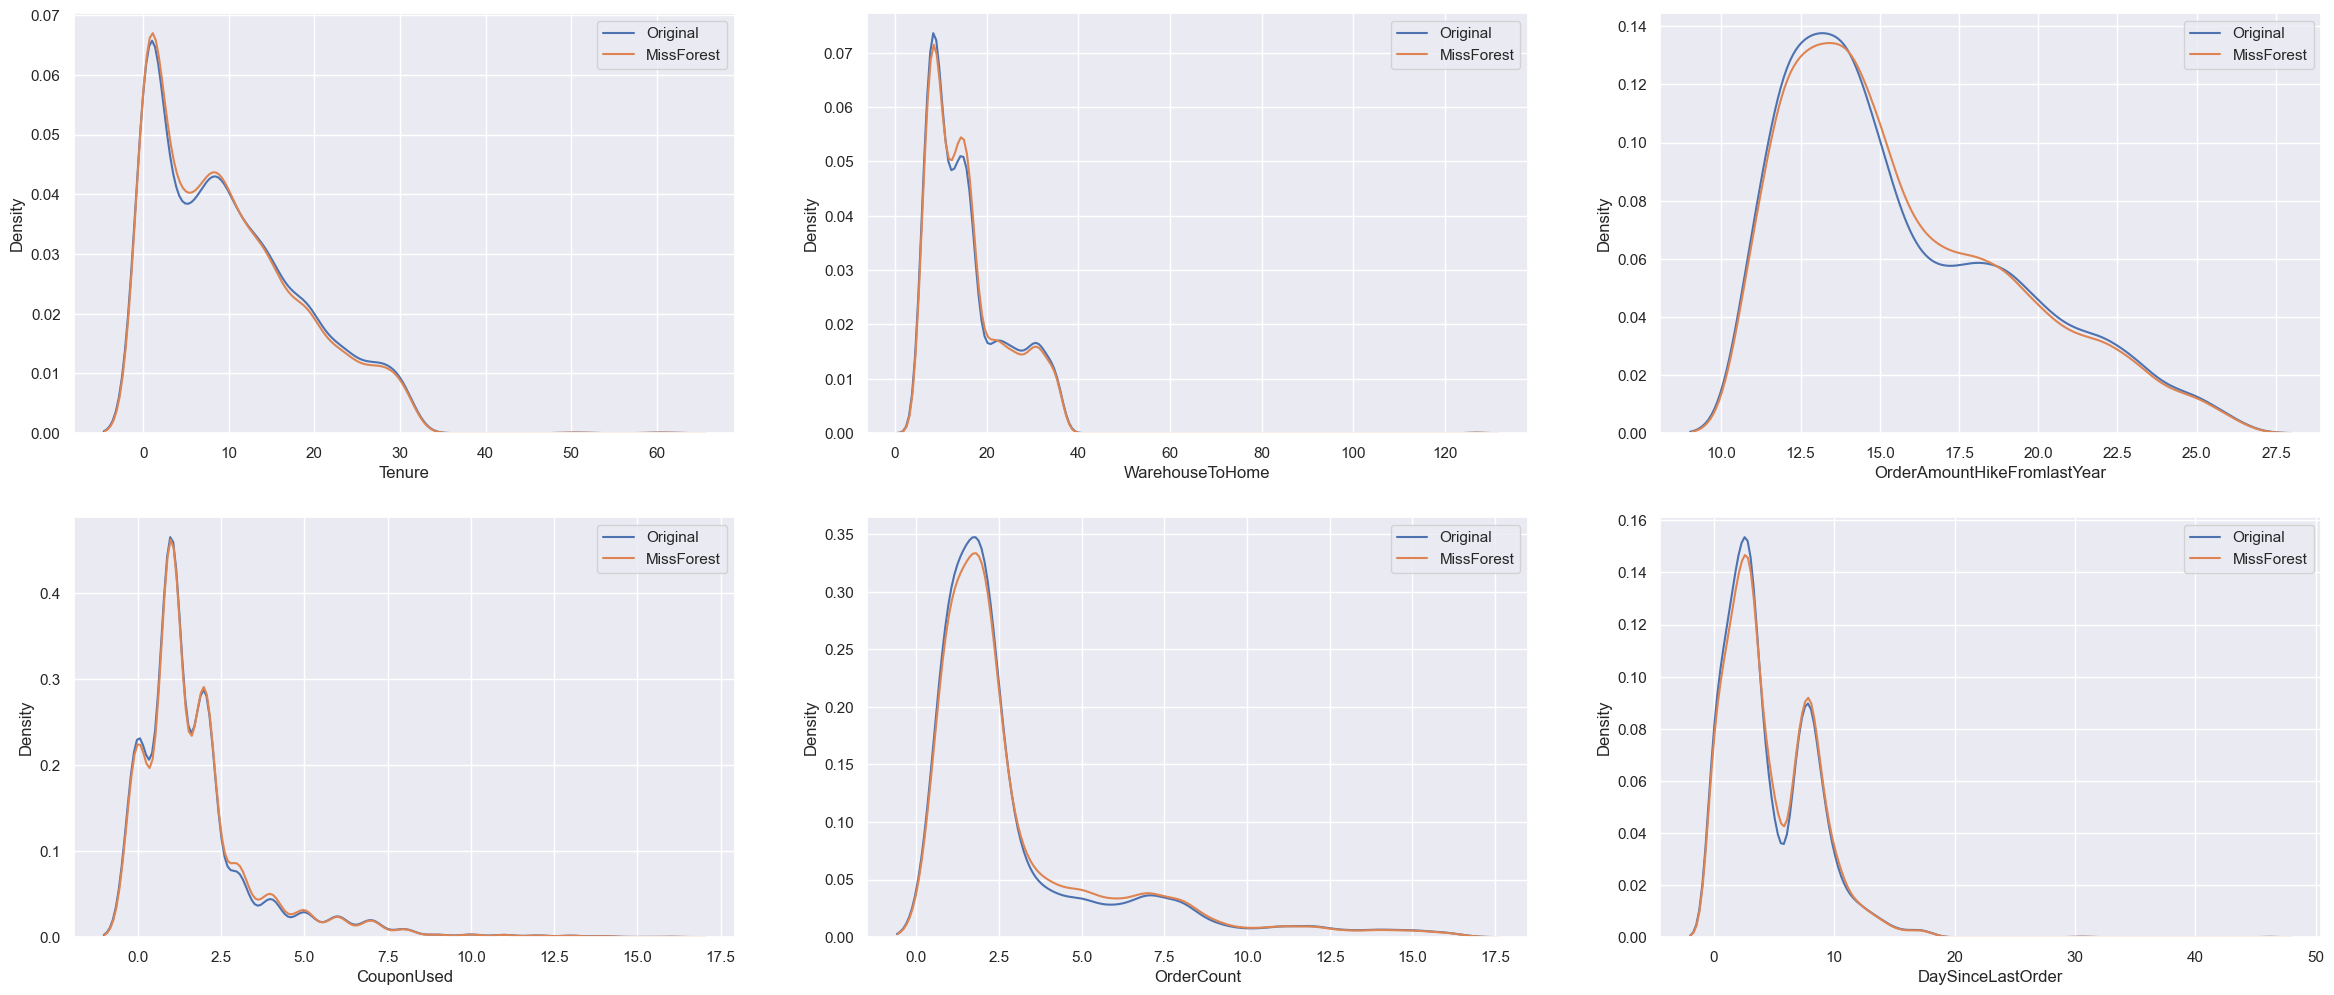

In [97]:
customerFull= customer.copy()
customerFull.drop(null_attr, axis=1, inplace=True)
customerFull= pd.concat((customerFull, pd.DataFrame(attrbs)), axis=1)
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(29,12),nrows=2, ncols=3)
for col,i,j in zip(null_attr,[0,0,0,1,1,1],[0,1,2,0,1,2]):
    sns.kdeplot(x = customer[col], label= 'Original', ax=ax[i][j] )
    sns.kdeplot(x = customerFull[col], label = 'MissForest', ax=ax[i][j] )

    ax[i][j].legend()

### Numeric Variables 
1. missing value 
2. outlier detection 
3. normalization 
not used for now, since decision tree can handle missing value and skewed data

In [ ]:
plt.rcParams.update({'font.size': 7})
fig, axes= plt.subplots(nrows=2,ncols=4, figsize=(12,6))
numCus= customer.select_dtypes(include=np.number).drop('CustomerID', axis=1)
for i, subplots in zip(numCus, axes.flatten()):
    sns.kdeplot(x=numCus[i], hue=customer['Churn'],ax= subplots, palette='BuPu')
for subplots in axes.flatten()[len(numCus.columns):]:
    subplots.remove()
plt.show()

<div class="alert alert-block alert-info">
<center><b>Exploratory Data Analysis</b> </center></div>

> Relationship between Numeric Variables vs. Churn

Kernel Density Estimate Plot is a powerful tool for estimating the probability density function of numeric data in relation to Churn. Given the following plot, __Tenure and WarehouseToHome__ are variables that differs relatively significant in terms of churn, while the rests variables have a similar property for both. 
- Recent consumers are more likely to Churn. 
- Consumers lives far from the warehouse are more likley to churn compared to those who live closer. 

Lastly, it's evident to conclude that consumers who shopped longer with the warehouse, using more coupon are likely to stay with the warehouse.  


In [ ]:
cusC, cusNC= customer[customer['Churn']==1].copy(), customer[customer['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(12, 6))
fig.suptitle('Density of Numeric Features by Churn', fontsize=10)
ax = ax.flatten()
num_cols= customer.select_dtypes(include=np.number).columns.tolist()[1:]
for idx,c in enumerate(num_cols):
    sns.kdeplot(cusC[c], label = 'Churn',ax=ax[idx],color='purple', fill= True, alpha=.5)
    sns.kdeplot(cusNC[c], label = 'No Churn',ax=ax[idx],color='lightblue', fill=True, alpha=.5)
    ax[idx].legend(loc='upper right')

plt.show()

> Relationship Between Categorical Variables vs Churn 

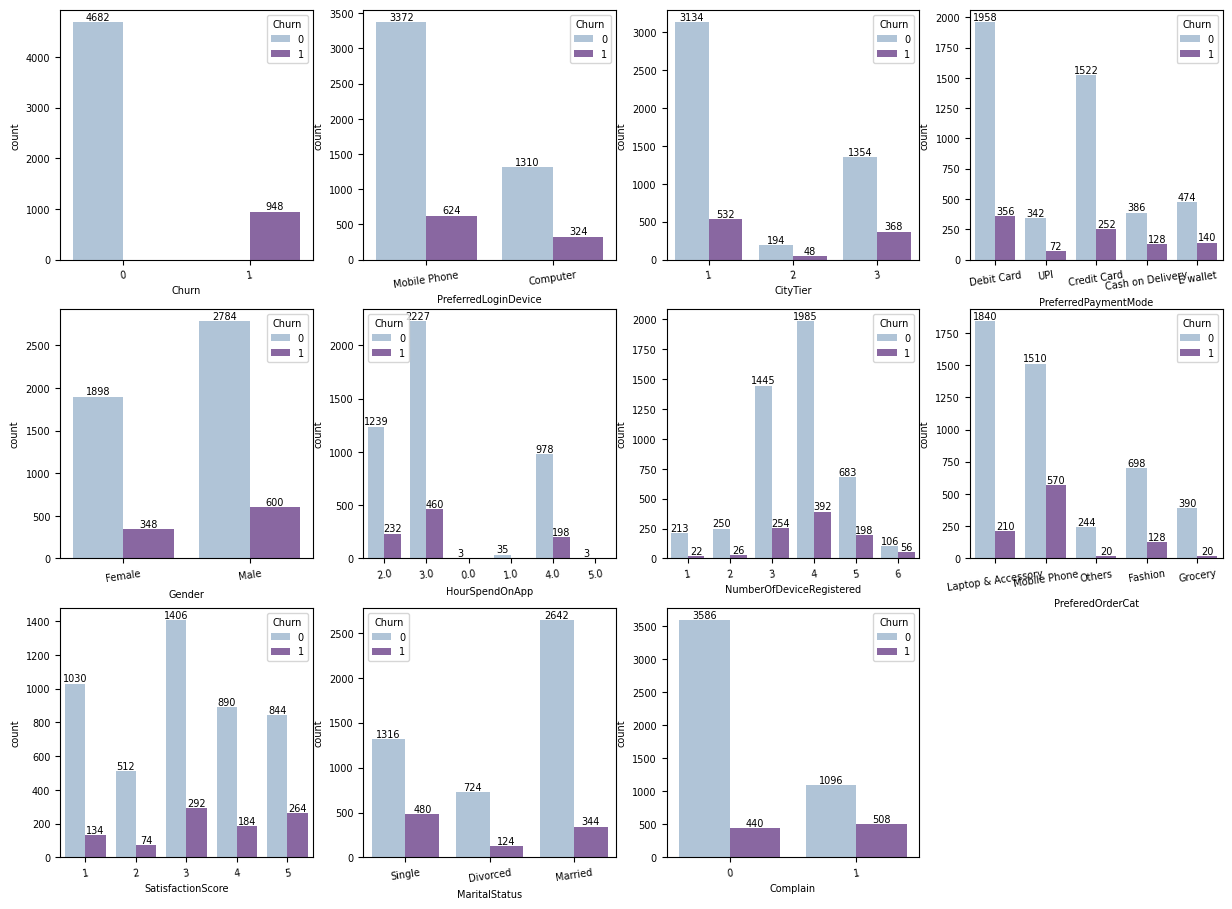

In [ ]:
customer.to_pickle('./modifiedCus.pkl')